In [1]:
import pandas as pd

In [3]:
import pickle
# Загрузка списка embeds из файла
with open('research_Сlustering_v3_treding_topics_dataset\df_before_naming.pkl', 'rb') as f:
    df = pickle.load(f)
    
df

,Time,Source,Topic,Cluster
0,2024-03-03,Twitter,Rashford,2
1,2024-03-03,Twitter,#sundayvibes,7
2,2024-03-03,Twitter,Xavier Worthy,5
3,2024-03-03,Twitter,Foden,2
4,2024-03-03,Twitter,#UFCVegas87,1
...,...,...,...,...
76135,2017-03-18,Google,Robert Osborne,5
76136,2017-03-18,Google,Alejandra Campoverdi,2
76137,2017-03-18,Google,Drake More Life,0
76138,2017-03-18,Google,Drake More Life Download,0


In [4]:
# Переводим тексты в формат для подсчёта coherence: list[list[str]]
texts_list = list(df.groupby(['Time'])['Topic'].apply(list))

In [6]:
texts_list

[['#MyLeastFavorite4Words',
  '#saturdaymorning',
  '#IFindItSexyWhen',
  '#NewJobsForKellyanneConway',
  'Greg Monroe',
  'Fareed Zakaria',
  'Air Jordan 12 Low',
  '#UFCLondon',
  'Josh Harrison',
  'Return of the Mack',
  '#TrumpcareIsWorseThan',
  'Brandon Crawford',
  'Kent State',
  '#OneLetterOffTvShows',
  'Northern Kentucky',
  'Gonzaga',
  'Villanova',
  'Artie Lange',
  'Auntie Fee',
  'Chuck Berry',
  'Real Madrid',
  'Brad Underwood',
  'Usc Basketball',
  'Michigan State basketball',
  'Xavier Woods',
  'Robert Osborne',
  'Alejandra Campoverdi',
  'Drake More Life',
  'Drake More Life Download',
  'Costco Travel'],
 ['Bernie Wrightson',
  '#ATLOrgy',
  '#SundayMorning',
  'Jimmy Breslin',
  '#4WordGreatIdeas',
  '#YouTubeIsOverParty',
  '#LAMarathon',
  '#SunshineFire',
  '#GGGJacobs',
  'Josh Jackson',
  '#SundayFunday',
  'Adam Jones',
  'Iowa State',
  '#BasketballIn4Words',
  '#BourbonBallATL',
  'Villanova',
  'Gonzaga',
  'GGG',
  'Auntie Fee',
  'Xavier Basketball

In [7]:
# Группировка текстов по кластерам
topics_df = df.groupby(['Cluster', 'Topic'])['Topic'].count().reset_index(name="count")

topics_df

,Cluster,Topic,count
0,0,#SongTherapy,1
1,0,#WorstMusicForAFuneral,1
2,0,$APE,1
3,0,10 Movies to Know Me,1
4,0,13 Reasons Why,4
...,...,...,...
31849,8,jerry seinfeld,1
31850,8,joe biden,1
31851,8,oligarch,1
31852,8,special prosecutor,1


In [8]:
# Берём n_top самых частых
n_top = 21
top_topics = topics_df.sort_values(['Cluster','count'],ascending=False).groupby('Cluster', group_keys=False).head(n_top)
top_topics_list = list(top_topics.groupby(['Cluster'])['Topic'].apply(list))[::-1] # в обратном порядке, так как отсортировали кластеры от 8 до 0 выше.

In [9]:
[f"Cluster {i}: {topic=}" for i, topic in enumerate(top_topics_list)]

["Cluster 0: topic=['Supreme Court', 'Dow Jones', 'Jimmy Carter', 'Rand Paul', 'Kamala Harris', 'North Korea', 'Ted Cruz', 'Liz Cheney', 'Alex Jones', 'Putin', 'John McCain', 'Pence', 'Hunter Biden', 'Nancy Pelosi', 'Antifa', 'Joe Biden', 'Trump', 'Jeff Bezos', 'Mitch McConnell', 'Rudy Giuliani', 'SCOTUS']",
 "Cluster 1: topic=['#MondayMotivation', '#ThursdayThoughts', '#SundayMorning', '#WednesdayWisdom', '#SaturdayMorning', '#TuesdayThoughts', '#FridayFeeling', '#sundayvibes', '#tuesdayvibe', '#wednesdaythought', '#fridaymorning', '#mondaythoughts', '#thursdaymorning', '#thursdayvibes', '#WednesdayMotivation', '#MondayMorning', '#SundayThoughts', '#TuesdayMotivation', '#SaturdayThoughts', '#saturdaymorning', '#FridayMotivation']",
 "Cluster 2: topic=['Earthquake', 'Messi', 'Bitcoin', 'Iran', 'Bitcoin price', 'Eid Mubarak', 'Tesla stock', 'Veterans Day', 'Happy Easter', 'School closings', 'Epic', 'Happy New Year', 'Merry Christmas', 'Thanksgiving', 'Cinco de Mayo', 'Halloween', 'Memor

In [10]:
# Подсчёт coherence как в LDA

from gensim.models.coherencemodel import CoherenceModel
from gensim.corpora import Dictionary
import numpy as np

# dataset of texts
texts = texts_list

# 2 clusters with 4 top words (если я правильно понял)
topics = top_topics_list
# get coherence value with its error for each cluster based on texts dataset
cm = CoherenceModel(topics=topics, texts=texts, dictionary= Dictionary(texts), coherence='c_v')
metrics = []
for i, (topic, (value,std)) in enumerate(zip(topics, cm.get_coherence_per_topic(with_std=True))):
  metrics.append(value)
  print(f"Coherence for cluster={i} with {topic=}\n {value:.2f} +- {std:.2f}\n")
print(f"Mean coherence = {np.mean(metrics)}")

Coherence for cluster=0 with topic=['Supreme Court', 'Dow Jones', 'Jimmy Carter', 'Rand Paul', 'Kamala Harris', 'North Korea', 'Ted Cruz', 'Liz Cheney', 'Alex Jones', 'Putin', 'John McCain', 'Pence', 'Hunter Biden', 'Nancy Pelosi', 'Antifa', 'Joe Biden', 'Trump', 'Jeff Bezos', 'Mitch McConnell', 'Rudy Giuliani', 'SCOTUS']
 0.57 +- 0.07

Coherence for cluster=1 with topic=['#MondayMotivation', '#ThursdayThoughts', '#SundayMorning', '#WednesdayWisdom', '#SaturdayMorning', '#TuesdayThoughts', '#FridayFeeling', '#sundayvibes', '#tuesdayvibe', '#wednesdaythought', '#fridaymorning', '#mondaythoughts', '#thursdaymorning', '#thursdayvibes', '#WednesdayMotivation', '#MondayMorning', '#SundayThoughts', '#TuesdayMotivation', '#SaturdayThoughts', '#saturdaymorning', '#FridayMotivation']
 0.79 +- 0.03

Coherence for cluster=2 with topic=['Earthquake', 'Messi', 'Bitcoin', 'Iran', 'Bitcoin price', 'Eid Mubarak', 'Tesla stock', 'Veterans Day', 'Happy Easter', 'School closings', 'Epic', 'Happy New Year

#### Tuning num clusters

Finding Optimal Clusters:   7%|▋         | 1/15 [00:13<03:13, 13.80s/it]

Coherence for cluster=0 with topic=['Lakers', 'Warriors', 'Celtics', 'Clippers', 'Knicks', 'Suns', 'Bruins', 'Bucks', 'Antonio Brown', 'Cavs', 'Miami Heat', 'Jimmy Butler', 'Draymond', 'Sixers', 'Lamar Jackson', 'Jokic', 'Bulls', 'Kyrie Irving', 'Spurs', 'Duke basketball', 'Josh Allen']
 0.39 +- 0.19

Coherence for cluster=1 with topic=['Real Madrid', 'Liverpool', 'Manchester United', 'Steelers', 'Barcelona', 'Eagles', 'Arsenal', 'Champions League', 'Packers', 'Chelsea', 'Chiefs', 'Premier League', 'Patriots', 'Seahawks', 'Raiders', '49ers', 'Dallas Cowboys', 'Cowboys', 'Ravens', 'NASCAR', 'Saints']
 0.51 +- 0.32

Coherence for cluster=2 with topic=['UFC', 'Tiger Woods', 'Supreme Court', 'Chris Paul', 'Jimmy Carter', 'Rand Paul', 'Klay', 'Paul George', 'Steph', 'Nadal', 'Anthony Davis', 'Nick Cannon', 'Ted Cruz', 'Bama', 'Conor McGregor', 'Aaron Judge', 'Bill Maher', 'Cam Newton', 'Roger Federer', 'Travis Scott', 'John McCain']
 0.58 +- 0.06

Coherence for cluster=3 with topic=['Earthq

Finding Optimal Clusters:  13%|█▎        | 2/15 [00:24<02:35, 11.97s/it]

Coherence for cluster=0 with topic=['Real Madrid', 'Liverpool', 'Manchester United', 'Barcelona', 'Arsenal', 'Champions League', 'Chelsea', 'Premier League', 'Europa League', 'FA Cup', 'Juventus', 'Messi', 'La Liga', 'Inter Miami', 'Tottenham', 'Cristiano Ronaldo', 'India vs England', 'Bayern Munich', 'Ukraine', 'Argentina', 'FC Barcelona']
 0.39 +- 0.15

Coherence for cluster=1 with topic=['Lakers', 'Warriors', 'Celtics', 'Clippers', 'Knicks', 'Suns', 'Bruins', 'Bucks', 'Antonio Brown', 'Cavs', 'Miami Heat', 'Jimmy Butler', 'Draymond', 'Sixers', 'Lamar Jackson', 'Jokic', 'Bulls', 'Kyrie Irving', 'Spurs', 'Duke basketball', 'Josh Allen']
 0.39 +- 0.19

Coherence for cluster=2 with topic=['Steelers', 'Eagles', 'Packers', 'Chiefs', 'Patriots', 'Seahawks', 'Raiders', '49ers', 'Dallas Cowboys', 'Cowboys', 'Ravens', 'NASCAR', 'Saints', 'Aaron Rodgers', 'NFL', 'Dodgers', 'Bengals', 'Browns', 'Tom Brady', 'Buffalo Bills', 'Giants']
 0.63 +- 0.38

Coherence for cluster=3 with topic=['UFC', 'Ti

Finding Optimal Clusters:  20%|██        | 3/15 [00:35<02:19, 11.61s/it]

Coherence for cluster=0 with topic=['#MondayMotivation', '#ThursdayThoughts', '#SundayMorning', '#WednesdayWisdom', '#SaturdayMorning', '#TuesdayThoughts', '#FridayFeeling', '#sundayvibes', '#tuesdayvibe', '#wednesdaythought', '#fridaymorning', '#mondaythoughts', '#thursdaymorning', '#thursdayvibes', '#WednesdayMotivation', '#MondayMorning', '#SundayThoughts', '#TuesdayMotivation', '#SaturdayThoughts', '#saturdaymorning', '#FridayMotivation']
 0.79 +- 0.03

Coherence for cluster=1 with topic=['Supreme Court', 'Dow Jones', 'North Korea', 'Messi', 'Bitcoin', 'Iran', 'Alex Jones', 'Putin', 'Pence', 'Antifa', 'Bitcoin price', 'Eid Mubarak', 'Trump', 'SCOTUS', 'Veterans Day', 'DACA', 'Happy Easter', 'School closings', 'CNN', 'Epic', 'Paul Ryan']
 0.64 +- 0.06

Coherence for cluster=2 with topic=['UFC', 'Antonio Brown', 'Tiger Woods', 'Chris Paul', 'Jimmy Butler', 'Jimmy Carter', 'Rand Paul', 'Klay', 'Paul George', 'Steph', 'Lamar Jackson', 'Nadal', 'Anthony Davis', 'Jokic', 'Josh Allen', 'L

Finding Optimal Clusters:  27%|██▋       | 4/15 [00:46<02:05, 11.45s/it]

Coherence for cluster=0 with topic=['Supreme Court', 'Dow Jones', 'Jimmy Carter', 'Rand Paul', 'Kamala Harris', 'North Korea', 'Ted Cruz', 'Liz Cheney', 'Alex Jones', 'Putin', 'John McCain', 'Pence', 'Hunter Biden', 'Nancy Pelosi', 'Antifa', 'Joe Biden', 'Trump', 'Jeff Bezos', 'Mitch McConnell', 'Rudy Giuliani', 'SCOTUS']
 0.57 +- 0.07

Coherence for cluster=1 with topic=['#MondayMotivation', '#ThursdayThoughts', '#SundayMorning', '#WednesdayWisdom', '#SaturdayMorning', '#TuesdayThoughts', '#FridayFeeling', '#sundayvibes', '#tuesdayvibe', '#wednesdaythought', '#fridaymorning', '#mondaythoughts', '#thursdaymorning', '#thursdayvibes', '#WednesdayMotivation', '#MondayMorning', '#SundayThoughts', '#TuesdayMotivation', '#SaturdayThoughts', '#saturdaymorning', '#FridayMotivation']
 0.79 +- 0.03

Coherence for cluster=2 with topic=['Earthquake', 'Messi', 'Bitcoin', 'Iran', 'Bitcoin price', 'Eid Mubarak', 'Tesla stock', 'Veterans Day', 'Happy Easter', 'School closings', 'Epic', 'Happy New Year

Finding Optimal Clusters:  33%|███▎      | 5/15 [00:59<01:58, 11.87s/it]

Coherence for cluster=0 with topic=['Supreme Court', 'Dow Jones', 'Jimmy Carter', 'Rand Paul', 'North Korea', 'Ted Cruz', 'Iran', 'Alex Jones', 'Putin', 'John McCain', 'Pence', 'Hunter Biden', 'Nancy Pelosi', 'Antifa', 'Eid Mubarak', 'Joe Biden', 'Trump', 'Jeff Bezos', 'Mitch McConnell', 'Rudy Giuliani', 'SCOTUS']
 0.60 +- 0.08

Coherence for cluster=1 with topic=['UFC', 'Antonio Brown', 'Tiger Woods', 'Chris Paul', 'Klay', 'Paul George', 'Steph', 'Nadal', 'Anthony Davis', 'Jokic', 'Josh Allen', 'Nick Cannon', 'Conor McGregor', 'Kevin Durant', 'Aaron Judge', 'Bill Maher', 'Cam Newton', 'Roger Federer', 'Damian Lillard', 'Jake Paul', 'Deshaun Watson']
 0.56 +- 0.08

Coherence for cluster=2 with topic=['#MondayMotivation', '#ThursdayThoughts', '#SundayMorning', '#WednesdayWisdom', '#SaturdayMorning', '#TuesdayThoughts', '#FridayFeeling', '#sundayvibes', '#tuesdayvibe', '#wednesdaythought', '#fridaymorning', '#mondaythoughts', '#thursdaymorning', '#thursdayvibes', '#WednesdayMotivation', 

Finding Optimal Clusters:  40%|████      | 6/15 [01:11<01:47, 11.97s/it]

Coherence for cluster=0 with topic=['Taylor Swift', 'Drake', 'Rihanna', 'Britney Spears', 'Billie Eilish', 'Pete Davidson', 'Kanye', 'Dolly Parton', 'Nicki Minaj', 'Kanye West', 'Post Malone', 'Eminem', 'Travis Scott', 'Adele', 'Chris Pratt', 'Kevin Hart', 'Michael Jackson', 'Bill Cosby', 'Ben Shapiro', 'Chris Brown', 'Meek']
 0.53 +- 0.09

Coherence for cluster=1 with topic=['Supreme Court', 'Dow Jones', 'Jimmy Carter', 'Rand Paul', 'North Korea', 'Ted Cruz', 'Iran', 'Alex Jones', 'Putin', 'John McCain', 'Pence', 'Hunter Biden', 'Nancy Pelosi', 'Antifa', 'Joe Biden', 'Trump', 'Jeff Bezos', 'Mitch McConnell', 'Rudy Giuliani', 'SCOTUS', 'Veterans Day']
 0.59 +- 0.08

Coherence for cluster=2 with topic=['UFC', 'Antonio Brown', 'Tiger Woods', 'Chris Paul', 'Klay', 'Paul George', 'Steph', 'Nadal', 'Anthony Davis', 'Jokic', 'Josh Allen', 'Nick Cannon', 'Conor McGregor', 'Kevin Durant', 'Aaron Judge', 'Bill Maher', 'Cam Newton', 'Roger Federer', 'Damian Lillard', 'Jake Paul', 'Deshaun Watson

Finding Optimal Clusters:  47%|████▋     | 7/15 [01:32<01:57, 14.74s/it]

Coherence for cluster=0 with topic=['Real Madrid', 'Liverpool', 'Manchester United', 'Barcelona', 'Arsenal', 'Champions League', 'Chelsea', 'Premier League', 'Europa League', 'FA Cup', 'Juventus', 'Spurs', 'La Liga', 'Tottenham', 'Bayern Munich', 'FC Barcelona', 'Barcelona vs Real Madrid', 'UEFA Champions League', 'Champions League draw', 'Liverpool vs Arsenal', 'Ronaldo']
 0.47 +- 0.11

Coherence for cluster=1 with topic=['Taylor Swift', 'Drake', 'Rihanna', 'Britney Spears', 'Billie Eilish', 'Pete Davidson', 'Kanye', 'Dolly Parton', 'Harry Styles', 'Nicki Minaj', 'Kanye West', 'Post Malone', 'Eminem', 'Travis Scott', 'Adele', 'Chris Pratt', 'Kevin Hart', 'Michael Jackson', 'Bill Cosby', 'Will Smith', 'Ben Shapiro']
 0.51 +- 0.10

Coherence for cluster=2 with topic=['Supreme Court', 'Dow Jones', 'Jimmy Carter', 'Rand Paul', 'Kamala Harris', 'Ted Cruz', 'Liz Cheney', 'Alex Jones', 'Putin', 'John McCain', 'Pence', 'Hunter Biden', 'Nancy Pelosi', 'Harvey Weinstein', 'Joe Biden', 'Trump', 

Finding Optimal Clusters:  53%|█████▎    | 8/15 [01:44<01:37, 13.97s/it]

Coherence for cluster=0 with topic=['Antonio Brown', 'Chris Paul', 'Jimmy Carter', 'Rand Paul', 'Klay', 'Paul George', 'Steph', 'Nadal', 'Anthony Davis', 'Jokic', 'Josh Allen', 'Nick Cannon', 'Ted Cruz', 'Kevin Durant', 'Aaron Judge', 'Bill Maher', 'Cam Newton', 'Roger Federer', 'Damian Lillard', 'John McCain', 'Hunter Biden']
 0.61 +- 0.06

Coherence for cluster=1 with topic=['Real Madrid', 'Liverpool', 'Manchester United', 'Barcelona', 'Arsenal', 'Champions League', 'Chelsea', 'Premier League', 'Europa League', 'FA Cup', 'Juventus', 'La Liga', 'Inter Miami', 'Tottenham', 'Cristiano Ronaldo', 'Bayern Munich', 'FC Barcelona', 'Barcelona vs Real Madrid', 'UEFA Champions League', 'Champions League draw', 'Liverpool vs Arsenal']
 0.45 +- 0.15

Coherence for cluster=2 with topic=['Taylor Swift', 'Rihanna', 'Britney Spears', 'Dolly Parton', 'Kylie Jenner', 'Nicki Minaj', 'Meghan Markle', 'Hope Hicks', 'Kim Kardashian', 'Adele', 'Chris Brown', 'Aaliyah', 'Demi Lovato', 'Ivanka Trump', 'Miley

Finding Optimal Clusters:  60%|██████    | 9/15 [01:57<01:22, 13.68s/it]

Coherence for cluster=0 with topic=['#ThursdayThoughts', '#TuesdayThoughts', '#sundayvibes', '#tuesdayvibe', '#wednesdaythought', '#mondaythoughts', '#thursdayvibes', '#SundayThoughts', '#SaturdayThoughts', '#FridayThoughts', '#wednesdaythoughts', '#tuesdayvibes', '#Mondayvibes', 'Twitter layoffs', '#70days', '#DeepThoughtsFromThe80s', '#JYPE_CancelGOT7HKConcerts', '#MondayVibes', '#The80sTaughtMe', '#WednesdayThoughts', '#prayfortexas']
 0.81 +- 0.03

Coherence for cluster=1 with topic=['Antonio Brown', 'Chris Paul', 'Klay', 'Paul George', 'Steph', 'Nadal', 'Anthony Davis', 'Jokic', 'Josh Allen', 'Nick Cannon', 'Kevin Durant', 'Aaron Judge', 'Bill Maher', 'Cam Newton', 'Roger Federer', 'Damian Lillard', 'Jake Paul', 'Deshaun Watson', 'Mac Miller', 'Mahomes', 'Ben Simmons']
 0.56 +- 0.06

Coherence for cluster=2 with topic=['Real Madrid', 'Liverpool', 'Manchester United', 'Barcelona', 'Arsenal', 'Champions League', 'Chelsea', 'Premier League', 'Europa League', 'FA Cup', 'Juventus', 'La

Finding Optimal Clusters:  67%|██████▋   | 10/15 [02:10<01:06, 13.37s/it]

Coherence for cluster=0 with topic=['Real Madrid', 'Liverpool', 'Manchester United', 'Steelers', 'Barcelona', 'Eagles', 'Arsenal', 'Champions League', 'Packers', 'Chelsea', 'Chiefs', 'Premier League', 'Patriots', 'Seahawks', 'Raiders', '49ers', 'Dallas Cowboys', 'Cowboys', 'Ravens', 'NASCAR', 'Saints']
 0.51 +- 0.32

Coherence for cluster=1 with topic=['#ThursdayThoughts', '#WednesdayWisdom', '#TuesdayThoughts', '#sundayvibes', '#tuesdayvibe', '#wednesdaythought', '#mondaythoughts', '#thursdayvibes', '#WednesdayMotivation', '#SundayThoughts', '#TuesdayMotivation', '#tuesdaymotivations', '#wednesdaythoughts', 'The Weeknd', '#wednesdaywisdom', '#MondayMood', '#tuesdayvibes', '#wednesdaymorning', '#TuesdayMorning', 'Good Monday', '#PlayersWeekend']
 0.74 +- 0.06

Coherence for cluster=2 with topic=['Antonio Brown', 'Tiger Woods', 'Chris Paul', 'Klay', 'Paul George', 'Steph', 'Nadal', 'Anthony Davis', 'Josh Allen', 'Nick Cannon', 'Aaron Judge', 'Bill Maher', 'Cam Newton', 'Roger Federer', 

Finding Optimal Clusters:  73%|███████▎  | 11/15 [02:22<00:52, 13.07s/it]

Coherence for cluster=0 with topic=['Steelers', 'Eagles', 'Packers', 'Chiefs', 'Patriots', 'Seahawks', 'Raiders', '49ers', 'Dallas Cowboys', 'Cowboys', 'Ravens', 'NASCAR', 'Saints', 'Aaron Rodgers', 'NFL', 'Dodgers', 'Bengals', 'Browns', 'Tom Brady', 'Buffalo Bills', 'Giants']
 0.63 +- 0.38

Coherence for cluster=1 with topic=['Real Madrid', 'Liverpool', 'Manchester United', 'Barcelona', 'Arsenal', 'Champions League', 'Chelsea', 'Premier League', 'Europa League', 'FA Cup', 'Juventus', 'Messi', 'La Liga', 'Inter Miami', 'Tottenham', 'Cristiano Ronaldo', 'Bayern Munich', 'FC Barcelona', 'Barcelona vs Real Madrid', 'UEFA Champions League', 'Champions League draw']
 0.43 +- 0.15

Coherence for cluster=2 with topic=['#ThursdayThoughts', '#WednesdayWisdom', '#TuesdayThoughts', '#sundayvibes', '#tuesdayvibe', '#wednesdaythought', '#mondaythoughts', '#thursdayvibes', '#WednesdayMotivation', '#SundayThoughts', '#TuesdayMotivation', '#tuesdaymotivations', '#wednesdaythoughts', '#wednesdaywisdom'

Finding Optimal Clusters:  80%|████████  | 12/15 [02:34<00:38, 12.76s/it]

Coherence for cluster=0 with topic=['Taylor Swift', 'Drake', 'Rihanna', 'Britney Spears', 'Billie Eilish', 'Pete Davidson', 'Kanye', 'Dolly Parton', 'Nicki Minaj', 'Kanye West', 'Post Malone', 'Eminem', 'Travis Scott', 'Adele', 'Chris Pratt', 'Kevin Hart', 'Michael Jackson', 'Bill Cosby', 'Ben Shapiro', 'Chris Brown', 'Meek']
 0.53 +- 0.09

Coherence for cluster=1 with topic=['Steelers', 'Eagles', 'Packers', 'Chiefs', 'Patriots', 'Seahawks', 'Raiders', '49ers', 'Dallas Cowboys', 'Cowboys', 'Ravens', 'NASCAR', 'Saints', 'Aaron Rodgers', 'NFL', 'Dodgers', 'Bengals', 'Browns', 'Tom Brady', 'Buffalo Bills', 'Giants']
 0.63 +- 0.38

Coherence for cluster=2 with topic=['Real Madrid', 'Liverpool', 'Manchester United', 'Barcelona', 'Arsenal', 'Champions League', 'Chelsea', 'Premier League', 'Europa League', 'FA Cup', 'Juventus', 'Messi', 'La Liga', 'Inter Miami', 'Tottenham', 'Cristiano Ronaldo', 'Bayern Munich', 'FC Barcelona', 'Barcelona vs Real Madrid', 'UEFA Champions League', 'Champions L

Finding Optimal Clusters:  87%|████████▋ | 13/15 [02:47<00:25, 12.67s/it]

Coherence for cluster=0 with topic=['Antonio Brown', 'Tiger Woods', 'Klay', 'Steph', 'Nadal', 'Anthony Davis', 'Jokic', 'Josh Allen', 'Kevin Durant', 'Simone Biles', 'Aaron Judge', 'Cam Newton', 'Roger Federer', 'Deshaun Watson', 'Mahomes', 'Ben Simmons', 'Russ', 'Joe Rogan', 'Bryce Harper', 'Colin Kaepernick', 'Tyreek Hill']
 0.62 +- 0.07

Coherence for cluster=1 with topic=['Taylor Swift', 'Drake', 'Rihanna', 'Britney Spears', 'Billie Eilish', 'Kanye', 'Dolly Parton', 'Nicki Minaj', 'Kanye West', 'Post Malone', 'Eminem', 'Travis Scott', 'Adele', 'Michael Jackson', 'Chris Brown', 'Meek', 'Usher', 'Aaliyah', 'Demi Lovato', 'Miley Cyrus', 'Beyonce']
 0.54 +- 0.08

Coherence for cluster=2 with topic=['Steelers', 'Eagles', 'Packers', 'Chiefs', 'Patriots', 'Seahawks', 'Raiders', '49ers', 'Dallas Cowboys', 'Cowboys', 'Ravens', 'NASCAR', 'Saints', 'Aaron Rodgers', 'NFL', 'Dodgers', 'Bengals', 'Browns', 'Tom Brady', 'Buffalo Bills', 'Giants']
 0.63 +- 0.38

Coherence for cluster=3 with topic=

Finding Optimal Clusters:  93%|█████████▎| 14/15 [02:59<00:12, 12.73s/it]

Coherence for cluster=0 with topic=['India vs England', 'India vs Pakistan', 'India vs Australia', 'India vs New Zealand', 'India vs West Indies', 'Mexico vs USA', 'India vs Bangladesh', 'India vs Sri Lanka', 'Jake Paul vs Nate Diaz', 'West Indies vs India', 'Bears vs Vikings', 'Brazil vs Argentina', 'Broncos vs Chiefs', 'Cowboys vs Rams', 'England vs Italy', 'Argentina vs Croatia', 'Australia vs India', 'Bills vs Patriots', 'Boca vs River', 'Braves vs Dodgers', 'Cowboys vs Giants']
 0.80 +- 0.03

Coherence for cluster=1 with topic=['Antonio Brown', 'Tiger Woods', 'Klay', 'Steph', 'Nadal', 'Anthony Davis', 'Jokic', 'Josh Allen', 'Kevin Durant', 'Simone Biles', 'Aaron Judge', 'Cam Newton', 'Roger Federer', 'Deshaun Watson', 'Mahomes', 'Ben Simmons', 'Russ', 'Joe Rogan', 'Bryce Harper', 'Colin Kaepernick', 'Tyreek Hill']
 0.62 +- 0.07

Coherence for cluster=2 with topic=['Taylor Swift', 'Drake', 'Rihanna', 'Britney Spears', 'Billie Eilish', 'Kanye', 'Dolly Parton', 'Nicki Minaj', 'Kanye 

Finding Optimal Clusters: 100%|██████████| 15/15 [03:13<00:00, 12.89s/it]

Coherence for cluster=0 with topic=['Mega Millions', 'Apple', 'Bad Bunny', 'Amber Alert', 'Chris Pratt', 'Zoom', 'Will Smith', 'CNN', 'Epic', 'Friday the 13th', 'Kodak', 'AR-15', 'Arnold Schwarzenegger', 'Fortnite', 'Kodak Black', 'Armie Hammer', 'GameStop', 'Nintendo Direct', 'SpaceX', 'Star Wars', 'Samsung']
 0.66 +- 0.07

Coherence for cluster=1 with topic=['India vs England', 'India vs Pakistan', 'India vs Australia', 'India vs New Zealand', 'India vs West Indies', 'Mexico vs USA', 'India vs Bangladesh', 'India vs Sri Lanka', 'Jake Paul vs Nate Diaz', 'West Indies vs India', 'Bears vs Vikings', 'Brazil vs Argentina', 'Broncos vs Chiefs', 'Cowboys vs Rams', 'England vs Italy', 'Argentina vs Croatia', 'Australia vs India', 'Bills vs Patriots', 'Boca vs River', 'Braves vs Dodgers', 'Cowboys vs Giants']
 0.80 +- 0.03

Coherence for cluster=2 with topic=['Antonio Brown', 'Tiger Woods', 'Klay', 'Steph', 'Anthony Davis', 'Jokic', 'Josh Allen', 'Kevin Durant', 'Simone Biles', 'Aaron Judge'

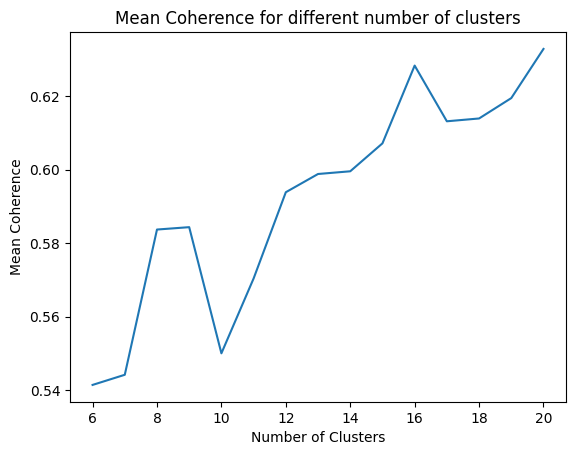

In [6]:
import matplotlib.pyplot as plt
import pickle
from sklearn.cluster import KMeans
from tqdm import tqdm
from gensim.models.coherencemodel import CoherenceModel
from gensim.corpora import Dictionary
import numpy as np
from sklearn.model_selection import train_test_split


# Загрузка списка embeds из файла
with open('research_Сlustering_v3_treding_topics_dataset\embeds.pkl', 'rb') as f:
    embeds = pickle.load(f)
    
with open('research_Сlustering_v3_treding_topics_dataset\df_before_naming.pkl', 'rb') as f:
    df = pickle.load(f)
    
# Разделение данных на обучающую и тестовую выборки
X_train, X_test = train_test_split(embeds, test_size=0.2, random_state=42)

# Функция для вычисления Mean coherence
def compute_mean_coherence(embeds, max_clusters):
    mean_coherences = []

    # Прогресс-бар
    for n_clusters in tqdm(range(6, max_clusters + 1), desc="Finding Optimal Clusters"):
        kmeans = KMeans(n_clusters=n_clusters, random_state=0, n_init="auto").fit(X_train)
        # Предсказание кластеров на всех данных
        labels = kmeans.predict(embeds)

        # Добавление предсказанных меток кластеров в DataFrame
        df['Cluster'] = labels
        
        # --------GOT CLUSTERING----------------------
        topics_df = df.groupby(['Cluster', 'Topic'])['Topic'].count().reset_index(name="count")
        n_top = 21
        top_topics = topics_df.sort_values(['Cluster','count'],ascending=False).groupby('Cluster', group_keys=False).head(n_top)
        top_topics_list = list(top_topics.groupby(['Cluster'])['Topic'].apply(list))[::-1]
        
        # Вычисление coherence
        texts = list(df.groupby(['Time'])['Topic'].apply(list))
        cm = CoherenceModel(topics=top_topics_list, texts=texts, dictionary=Dictionary(texts), coherence='c_v')
        mean_coherence = np.mean(cm.get_coherence_per_topic())
        mean_coherences.append(mean_coherence)
        metrics = []
        for i, (topic, (value,std)) in enumerate(zip(top_topics_list, cm.get_coherence_per_topic(with_std=True))):
            metrics.append(value)
            print(f"Coherence for cluster={i} with {topic=}\n {value:.2f} +- {std:.2f}\n")
        print(f"Mean coherence = {np.mean(metrics)}")

    return mean_coherences

# Определение максимального количества кластеров для проверки
max_clusters = 20

# Вычисление Mean coherence для разного количества кластеров
mean_coherences = compute_mean_coherence(embeds, max_clusters)

# Визуализация результатов
plt.plot(range(6, max_clusters + 1), mean_coherences)
plt.xlabel('Number of Clusters')
plt.ylabel('Mean Coherence')
plt.title('Mean Coherence for different number of clusters')
plt.show()


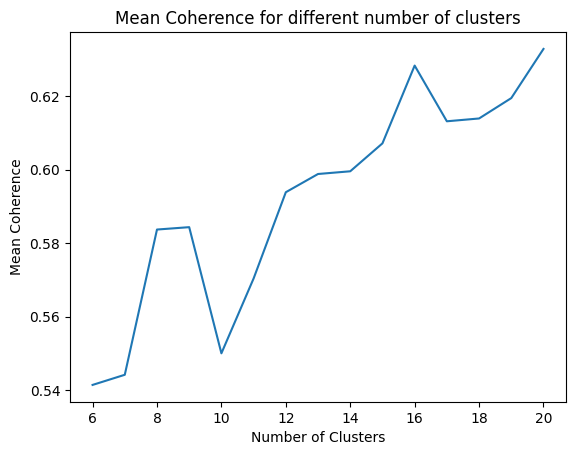

In [5]:
plt.plot(range(6, max_clusters + 1), mean_coherences)
plt.xlabel('Number of Clusters')
plt.ylabel('Mean Coherence')
plt.title('Mean Coherence for different number of clusters')
plt.show()

In [ ]:
# dataset of texts
texts = texts_list

# 2 clusters with 4 top words (если я правильно понял)
topics = top_topics_list
# get coherence value with its error for each cluster based on texts dataset
cm = CoherenceModel(topics=topics, texts=texts, dictionary= Dictionary(texts), coherence='c_v')
metrics = []
for i, (topic, (value,std)) in enumerate(zip(topics, cm.get_coherence_per_topic(with_std=True))):
  metrics.append(value)
  print(f"Coherence for cluster={i} with {topic=}\n {value:.2f} +- {std:.2f}\n")
print(f"Mean coherence = {np.mean(metrics)}")

#### Tuning n_top

In [2]:
%pip install gensim

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Program Files\Python39\python.exe -m pip install --upgrade pip' command.


In [7]:
import pandas as pd
import pickle
from gensim.models.coherencemodel import CoherenceModel
from gensim.corpora import Dictionary
import numpy as np
from tqdm import tqdm

# Загрузка списка embeds из файла
with open('research_Сlustering_v3_treding_topics_dataset\df_before_naming.pkl', 'rb') as f:
    df = pickle.load(f)

# Переводим тексты в формат для подсчёта coherence: list[list[str]]
texts_list = list(df.groupby(['Time'])['Topic'].apply(list))

# Группировка текстов по кластерам
topics_df = df.groupby(['Cluster', 'Topic'])['Topic'].count().reset_index(name="count")

def calculate_coherence(n_top):
    # Берём n_top самых частых
    top_topics = topics_df.sort_values(['Cluster','count'],ascending=False).groupby('Cluster', group_keys=False).head(n_top)
    top_topics_list = list(top_topics.groupby(['Cluster'])['Topic'].apply(list))[::-1] # в обратном порядке, так как отсортировали кластеры от 8 до 0 выше.

    # dataset of texts
    texts = texts_list

    # 2 clusters with 4 top words (если я правильно понял)
    topics = top_topics_list
    # get coherence value with its error for each cluster based on texts dataset
    cm = CoherenceModel(topics=topics, texts=texts, dictionary= Dictionary(texts), coherence='c_v')
    metrics = []
    for i, (topic, (value,std)) in enumerate(zip(topics, cm.get_coherence_per_topic(with_std=True))):
        metrics.append(value)
        #print(f"Coherence for cluster={i} with {topic=}\n {value:.2f} +- {std:.2f}\n")
    return metrics

# Диапазон значений для n_top
n_top_values = range(5, 25, 5)  # Можно изменить диапазон при необходимости

coherence_results = []

# Перебор значений n_top
for n_top in tqdm(n_top_values, desc="Tuning n_top", leave=False):
    coherence_results.append(calculate_coherence(n_top))

# Вывод результатов
for i, n_top in enumerate(n_top_values):
    print(f"n_top = {n_top}:")
    for j, coherence in enumerate(coherence_results[i]):
        print(f"  Cluster {j}: Coherence = {coherence:.2f}")


Tuning n_top:   0%|          | 0/4 [00:00<?, ?it/s]

#### mean_coherence for 7 clusters

In [1]:
import pickle
# Загрузка списка embeds из файла
with open('df_7_clusters_before_naming.pkl', 'rb') as f:
    df = pickle.load(f)
    
df

,Time,Source,Topic,Cluster
0,2024-03-03,Twitter,Rashford,5
1,2024-03-03,Twitter,#sundayvibes,2
2,2024-03-03,Twitter,Xavier Worthy,0
3,2024-03-03,Twitter,Foden,6
4,2024-03-03,Twitter,#UFCVegas87,2
...,...,...,...,...
76135,2017-03-18,Google,Robert Osborne,0
76136,2017-03-18,Google,Alejandra Campoverdi,6
76137,2017-03-18,Google,Drake More Life,3
76138,2017-03-18,Google,Drake More Life Download,3


In [2]:
# Переводим тексты в формат для подсчёта coherence: list[list[str]]
texts_list = list(df.groupby(['Time'])['Topic'].apply(list))

# Группировка текстов по кластерам
topics_df = df.groupby(['Cluster', 'Topic'])['Topic'].count().reset_index(name="count")

# Берём n_top самых частых
n_top = 21
top_topics = topics_df.sort_values(['Cluster','count'],ascending=False).groupby('Cluster', group_keys=False).head(n_top)
top_topics_list = list(top_topics.groupby(['Cluster'])['Topic'].apply(list))[::-1] # в обратном порядке, так как отсортировали кластеры от 8 до 0 выше.

[f"Cluster {i}: {topic=}" for i, topic in enumerate(top_topics_list)]

["Cluster 0: topic=['PSG', 'Elon Musk', 'Powerball', 'jungkook', 'Luka', 'hobi', 'Cardi B', 'Mega Millions', 'Apple', 'Messi', 'Bad Bunny', 'Bitcoin', 'Ja Morant', 'Juneteenth', 'Nuggets', 'Bitcoin price', 'Nicki', 'Eid Mubarak', 'Kawhi', 'LinkedIn', 'Krispy Kreme']",
 "Cluster 1: topic=['Earthquake', 'NASCAR', 'F1', 'Man City', 'Nets', 'Zoom', 'Dolphins', 'Lizzo', 'Snake', 'Coachella', 'Halsey', 'Dune', 'Iowa', 'Michigan', 'Tampa Bay Lightning', 'Grimes', 'Puerto Rico', 'Israel', 'Oregon', 'Pop Smoke', 'Supreme']",
 "Cluster 2: topic=['Lakers', 'Real Madrid', 'Warriors', 'Celtics', 'Liverpool', 'Manchester United', 'Steelers', 'Barcelona', 'Eagles', 'Arsenal', 'Champions League', 'Packers', 'Chelsea', 'Chiefs', 'Premier League', 'Clippers', 'Knicks', 'Patriots', 'Seahawks', 'Raiders', 'Suns']",
 "Cluster 3: topic=['Taylor Swift', 'Drake', 'Serena Williams', 'Rihanna', 'Britney Spears', 'Billie Eilish', 'Pete Davidson', 'Kanye', 'Dolly Parton', 'Kylie Jenner', 'Harry Styles', 'Nicki Mi

In [3]:
# Подсчёт coherence как в LDA

from gensim.models.coherencemodel import CoherenceModel
from gensim.corpora import Dictionary
import numpy as np

# dataset of texts
texts = texts_list

# 2 clusters with 4 top words (если я правильно понял)
topics = top_topics_list
# get coherence value with its error for each cluster based on texts dataset
cm = CoherenceModel(topics=topics, texts=texts, dictionary= Dictionary(texts), coherence='c_v')
metrics = []
for i, (topic, (value,std)) in enumerate(zip(topics, cm.get_coherence_per_topic(with_std=True))):
  metrics.append(value)
  print(f"Coherence for cluster={i} with {topic=}\n {value:.2f} +- {std:.2f}\n")
print(f"Mean coherence = {np.mean(metrics)}")

Coherence for cluster=0 with topic=['PSG', 'Elon Musk', 'Powerball', 'jungkook', 'Luka', 'hobi', 'Cardi B', 'Mega Millions', 'Apple', 'Messi', 'Bad Bunny', 'Bitcoin', 'Ja Morant', 'Juneteenth', 'Nuggets', 'Bitcoin price', 'Nicki', 'Eid Mubarak', 'Kawhi', 'LinkedIn', 'Krispy Kreme']
 0.59 +- 0.05

Coherence for cluster=1 with topic=['Earthquake', 'NASCAR', 'F1', 'Man City', 'Nets', 'Zoom', 'Dolphins', 'Lizzo', 'Snake', 'Coachella', 'Halsey', 'Dune', 'Iowa', 'Michigan', 'Tampa Bay Lightning', 'Grimes', 'Puerto Rico', 'Israel', 'Oregon', 'Pop Smoke', 'Supreme']
 0.64 +- 0.07

Coherence for cluster=2 with topic=['Lakers', 'Real Madrid', 'Warriors', 'Celtics', 'Liverpool', 'Manchester United', 'Steelers', 'Barcelona', 'Eagles', 'Arsenal', 'Champions League', 'Packers', 'Chelsea', 'Chiefs', 'Premier League', 'Clippers', 'Knicks', 'Patriots', 'Seahawks', 'Raiders', 'Suns']
 0.35 +- 0.20

Coherence for cluster=3 with topic=['Taylor Swift', 'Drake', 'Serena Williams', 'Rihanna', 'Britney Spears